[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/02_numerics/balancing_stick.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Option 1: call `scipy` library function

`solve_ivp(fun, t_span, y0, ...)` uses [explicit RK45 by default](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)

In [2]:
# Integrate the single pendulum problem for the stick-balancing problem
g = 9.8 # gravity in m/s2
L = 0.1 # length of the pendulum in meters
F = lambda t,y: [y[1], -g/L*np.sin(y[0])] # define the inline function

# Solve ODE with RK45 at large angle
sol = solve_ivp(F, [0,1], [np.pi-0.05,0], rtol=1e-5) # start being ~3 degrees off balance
# Unpack solution
t, y = sol.t, sol.y # note that two numpy.ndarray are stacked in y = [theta, dtheta]

In [3]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

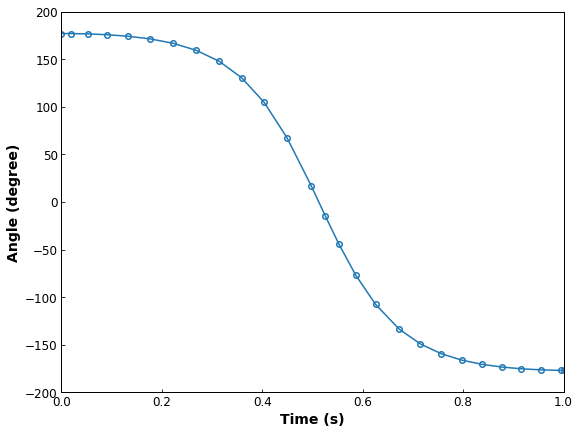

In [4]:
# Plot solution
fig, ax = plt.subplots(1,1,figsize=(9,7))

plt.plot(t, y[0,:]*180/np.pi, '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5) # convert to degrees

# Set axes range
ax.set_xlim(0,1)
ax.set_ylim(-200,200)

# Set axes labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angle (degree)')

plt.show()

### Option 2: rewrite `ode45` function in Python

In [5]:
from scipy.integrate import ode

In [6]:
# Creating a function equivalent to ode45 in Matlab
def ode45(f, tint, y0, rtol=1e-9):
    """Python implementation of MATLAB ode45

    Args:
        f (function): differential equation to solve
        tint (list): time interval endpoints
        y0 (list): initial condition
        rtol (float): relative tolerance

    Returns:
        tt (list): time intervel
        rr (list): array of solutions (theta, dtheta)
        
    """
    
    r = ode(f).set_integrator('zvode', method='bdf',rtol=rtol)
    r.set_initial_value(y0, tint[0])
    dt = (tint[1]-tint[0])/100
    t1 = tint[1]
    tt = []
    rr = []
    while r.successful() and r.t < t1:
        tt.append(r.t+dt)
        rr.append(np.real(r.integrate(r.t+dt)))
        
    return tt, rr

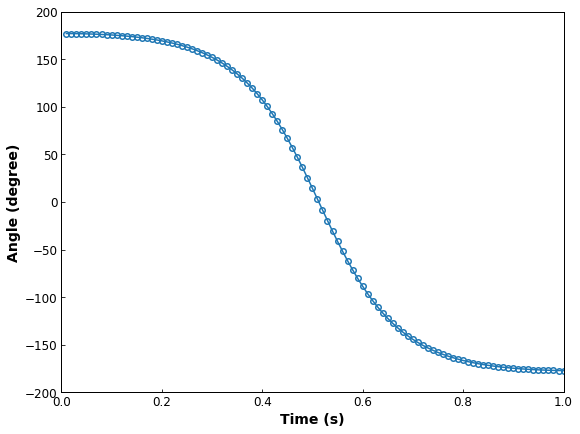

In [7]:
# Integrate the single pendulum problem for the stick-balancing problem
g = 9.8 # gravity in m/s2
L = 0.1 # length of the pendulum in meters
F = lambda t,y: [y[1], -g/L*np.sin(y[0])] # define the inline function

# Solve ODE with custom ode45 at large angle
t, y = ode45(F, [0,1], [np.pi-0.05,0], rtol=1e-5) # start being ~3 degrees off balance
y = np.array(y)

# Plot solution
fig, ax = plt.subplots(1,1,figsize=(9,7))

plt.plot(t, y[:,0]*180/np.pi, '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5) # convert to degrees

# Set axes range
ax.set_xlim(0,1)
ax.set_ylim(-200,200)

# Set axes labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angle (degree)')

plt.show()